# **Import required library**


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense


# **Exploring the malware datasets**

Malware dataset is collected on [Kaggle by this link](https://www.kaggle.com/datasets/amauricio/pe-files-malwares) :

*   19611
unique values
*   6051 downloads and gain 135 downloads in the last 30 days

In [1]:
#import neccessary packages
import pandas as pd
import matplotlib.pyplot as plt

path = ".\dataset\dataset_malwares.csv"
df = pd.read_csv(path)


In [2]:
# Explore the shape of the dataset
print("The shape of the dataset is: %d samples, %d features" % (df.shape[0], df.shape[1]))

The shape of the dataset is: 19611 samples, 79 features


In [3]:
df.describe()

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
count,19611.0,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.00000,19611.000000,...,1.961100e+04,19611.0,19611.000000,19611.000000,19611.000000,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04
mean,23117.0,178.615726,71.660752,49.146958,37.370710,37.032635,64178.739687,10.418490,226.46530,29.689103,...,3.163632e+09,0.0,6.112437,101.912804,14.131865,3.368566e+05,4.047213e+05,5.555810e+05,1.238834e+06,8.814868e+05
std,0.0,987.200729,1445.192977,1212.201919,864.515405,915.833139,9110.755873,637.116265,1249.68033,1015.303419,...,5.860332e+08,0.0,7.525158,127.076767,154.958102,2.181191e+07,4.704601e+06,6.772167e+06,5.868961e+07,2.167579e+07
min,23117.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,1.073742e+09,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,23117.0,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.00000,0.000000,...,3.221226e+09,0.0,2.000000,17.000000,0.000000,0.000000e+00,2.960400e+04,4.096000e+04,0.000000e+00,0.000000e+00
50%,23117.0,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.00000,0.000000,...,3.221226e+09,0.0,4.000000,80.000000,0.000000,0.000000e+00,8.222400e+04,1.310720e+05,0.000000e+00,0.000000e+00
75%,23117.0,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.00000,0.000000,...,3.221226e+09,0.0,8.000000,135.000000,0.000000,0.000000e+00,2.477080e+05,3.870720e+05,0.000000e+00,3.184640e+05
max,23117.0,59448.000000,63200.000000,64613.000000,43690.000000,43690.000000,65535.000000,61436.000000,65464.00000,63262.000000,...,4.294967e+09,0.0,588.000000,4016.000000,7319.000000,2.147484e+09,5.368914e+08,8.304108e+08,2.906159e+09,2.415919e+09


In [4]:
df.head()

,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,VirusShare_a878ba26000edaac5c98eff4432723b3,23117,144,3,0,4,0,65535,0,184,...,3758096608,0,7,152,0,0,54440,77824,73728,0
1,VirusShare_ef9130570fddc174b312b2047f5f4cf0,23117,144,3,0,4,0,65535,0,184,...,3791650880,0,16,311,0,0,262276,294912,0,346112
2,VirusShare_ef84cdeba22be72a69b198213dada81a,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,6,176,0,0,36864,40960,0,0
3,VirusShare_6bf3608e60ebc16cbcff6ed5467d469e,23117,144,3,0,4,0,65535,0,184,...,3224371328,0,8,155,0,0,356352,1003520,0,14109472
4,VirusShare_2cc94d952b2efb13c7d6bbe0dd59d3fb,23117,144,3,0,4,0,65535,0,184,...,3227516992,0,2,43,0,0,61440,73728,0,90624


In [5]:
df["Malware"].value_counts()

Malware
1    14599
0     5012
Name: count, dtype: int64

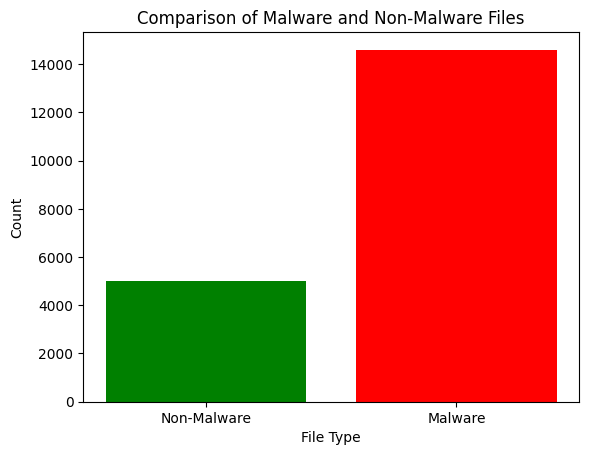

In [6]:
# Calculate counts of malware and non-malware
malware_count = (df['Malware'] == 1).sum()  # Summing the 1s (which represent malware)
non_malware_count = len(df) - malware_count  # Total count minus malware count

# Bar chart
categories = ['Non-Malware', 'Malware']
counts = [non_malware_count, malware_count]

plt.bar(categories, counts, color=['green', 'red'])
plt.xlabel('File Type')
plt.ylabel('Count')
plt.title('Comparison of Malware and Non-Malware Files')
plt.show()
#after plotting the grapth we can see that the data is imbalanced it might cause some
#problems to the model as well

**DATA CLEANING**

In [7]:
y = df["Malware"]
x = df.drop(columns = ["Malware","Name","LoaderFlags"])
print("The Name and Malware are remove successfully")
#left this part for further works later


The Name and Malware are remove successfully


# **Splitting the dataset into test set and train set**

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [9]:
# Information of training set
print("The shape of training set is: %d samples, %d features" % (X_train.shape[0], X_train.shape[1]))

The shape of training set is: 15688 samples, 76 features


In [10]:
y_train.value_counts()

Malware
1    11671
0     4017
Name: count, dtype: int64

In [14]:
y_test.value_counts()

Malware
1    2928
0     995
Name: count, dtype: int64

In [11]:
X_test.shape

(3923, 76)

***Deal with imbalanced data***
* Reference: [Deal with imbalanced data](https://towardsdatascience.com/how-to-deal-with-imbalanced-data-34ab7db9b100) 

In [12]:
# import necessary libs
from sklearn.utils import resample

In [13]:
# concatenate our training data back together
df = pd.concat([X_train, y_train], axis=1)

df_majority = df[df.Malware == 1]
df_minority = df[df.Malware == 0]

 # Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=len(df_minority),  # to match minority class
                                 random_state=1234) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled["Malware"].value_counts()


Malware
1    4017
0    4017
Name: count, dtype: int64

In [14]:
y_train_v1 = df_downsampled["Malware"]
x_train_v1 = df_downsampled.drop(columns = ["Malware"])
print("The Malware are remove successfully")

#left this part for further works later

The Malware are remove successfully


In [15]:
y_train_v1.value_counts()

Malware
1    4017
0    4017
Name: count, dtype: int64

***Features scaling***

In [16]:
x_train_v1.shape

(8034, 76)

In [17]:
X_test.shape

(3923, 76)

In [18]:
y_train_v1.value_counts()

Malware
1    4017
0    4017
Name: count, dtype: int64

# **Model**

**Sequential model**

In [19]:
from keras.models import Sequential # type: ignore
from keras.layers import Dense, Dropout # type: ignore
from keras.optimizers import Adam # type: ignore

model = Sequential()
model.add(Dense(62, activation='relu', input_shape=(76,))) # Increase neurons
model.add(Dense(62, activation='relu'))  # Add more layers
model.add(Dropout(0.5))  # Regularization
model.add(Dense(32, activation='relu'))  # Additional layer
model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.001)  # Set learning rate directly
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
model.fit(x_train_v1,y_train_v1,epochs = 3)

Epoch 1/3


d:\Federated_Learning\venv\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6694 - loss: 334107168.0000
Epoch 2/3
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7234 - loss: 46877928.0000
Epoch 3/3
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6016 - loss: 90817104.0000


***Sequential model Evaluation on test data***

In [20]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

In [21]:
X_test

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
16827,23117,144,3,0,4,0,65535,0,184,0,...,3221225536,0,11,154,8,117200,123540,131072,0,0
16248,23117,144,3,0,4,0,65535,0,184,0,...,3221225536,0,11,138,2,93792,115880,122880,110592,0
7109,23117,144,3,0,4,0,65535,0,184,0,...,3221225536,0,11,267,0,0,86500,200704,0,0
3971,23117,144,3,0,4,0,65535,0,184,0,...,1610612768,0,1,1,0,0,225624,237568,0,0
7672,23117,144,3,0,4,0,65535,0,184,0,...,3758096512,0,0,0,0,0,1801976,1449984,0,700032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9389,23117,144,3,0,4,0,65535,0,184,0,...,3758096480,0,6,96,0,0,5964,40960,0,0
8079,23117,144,3,0,4,0,65535,0,184,0,...,3221225536,0,4,91,0,0,25876,45056,0,0
9226,23117,144,3,0,4,0,65535,0,184,0,...,3221225536,0,1,67,0,0,79380,266240,0,0
3245,23117,144,3,0,4,0,65535,0,184,0,...,3221225600,0,8,155,0,0,29872,225280,0,212072


In [22]:
# Predict on test data
predictions = model.predict(X_test)




123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [23]:
predictions


array([[1.],
       [0.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [24]:
accuracy_score(y_test,predictions)

0.8100943155748151

In [25]:
y_test.value_counts()

Malware
1    2928
0     995
Name: count, dtype: int64

In [27]:
f1_score(y_test,predictions)

0.8797805389704696

In [28]:
print(len(X_test))

3923


***Confusion matrix-Sequential model***

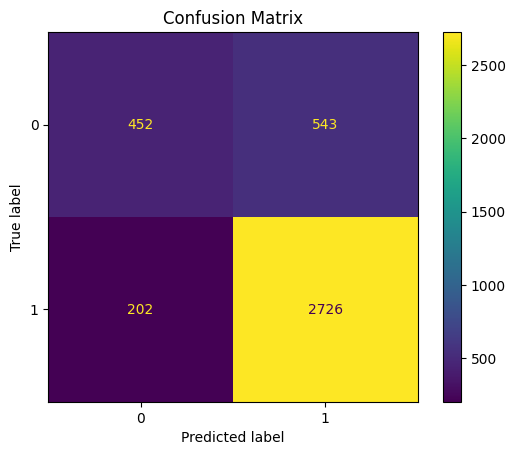

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm_display = ConfusionMatrixDisplay.from_predictions(
   y_test,predictions)
cm_display.ax_.set_title('Confusion Matrix')
plt.show()

In [32]:
from sklearn.metrics import classification_report
# Generate classification report
report_dict = classification_report(y_test, predictions, output_dict=True)

# Convert the dictionary to a DataFrame for better visualization
report_df = pd.DataFrame(report_dict).transpose()

# Display the classification report DataFrame
print(report_df)

              precision    recall  f1-score      support
0              0.691131  0.454271  0.548211   995.000000
1              0.833894  0.931011  0.879781  2928.000000
accuracy       0.810094  0.810094  0.810094     0.810094
macro avg      0.762513  0.692641  0.713996  3923.000000
weighted avg   0.797685  0.810094  0.795684  3923.000000


***Save model***

In [ ]:
from tensorflow.keras.models import Sequential

# Assuming 'model' is your trained Sequential model
model.save("save_7_model_of_resampling_data_downscale.h5")
